# Pymaceuticals Inc.
---

### Analysis

- 

The initial observation reveals that the number of observed mouse timepoints for 'Capomulin' and 'Ramicane' surpasses that of other Drug Regimens, as illustrated in the bar charts.

Secondly, the average tumor volume is notably lower for 'Capomulin' and 'Ramicane'. Among the four selected drugs ('Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'), the former two exhibit lower tumor volumes. The exception lies in 'Infubinol', with a tumor volume of 36.32, significantly lower than the majority of the dataset, thus standing as an outlier.

Thirdly, the tumor volume for Mouse ID l509, administered with 'Capomulin', exhibits an overall decline. During the initial timepoints, the tumor volume showed an increasing trend, but after timepoint 20, there is a drastic reduction in tumor volume.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merge_df = pd.merge(study_results, mouse_metadata, on = "Mouse ID")

# Display the data table for preview
merge_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [2]:
# Checking the number of mice.
count = len(merge_df["Mouse ID"].unique())
count

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = merge_df[merge_df.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]
duplicate_mice_ids = duplicate_mice['Mouse ID'].unique()
print(duplicate_mice_ids)

['g989']


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_data = merge_df.loc[merge_df['Mouse ID']=='g989', :]
duplicate_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
value_to_drop = 'g989'
clean_df = merge_df[merge_df['Mouse ID'] != value_to_drop]

In [6]:
# Checking the number of mice in the clean DataFrame.
count_unique = len(clean_df["Mouse ID"].unique())
count_unique

248

## Summary Statistics

In [7]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen 

# Using the aggregation method, produce the same summary statistics in a single line

summary_stats = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
summary_stats

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

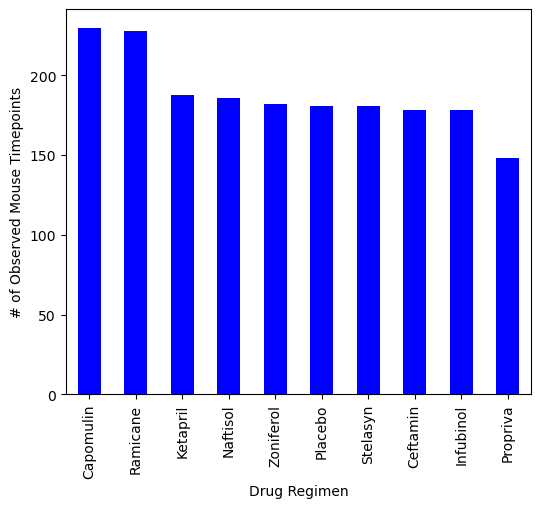

In [8]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
drug_counts = clean_df.groupby('Drug Regimen').size()
drug_counts_sorted = drug_counts.sort_values(ascending=False)
drug_counts_sorted.plot(kind='bar', color='blue', figsize=(6, 5))
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.show()

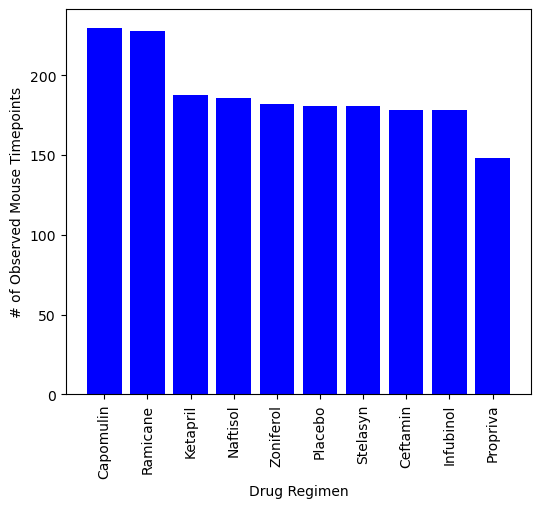

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
drug_regimens = drug_counts.index.tolist()
counts = drug_counts.values.tolist()
sorted_data = sorted(zip(drug_regimens, counts), key=lambda x: x[1], reverse=True)
drug_regimens, counts = zip(*sorted_data)
plt.figure(figsize=(6, 5))
plt.bar(drug_regimens, counts, color='blue')
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.xticks(rotation=90)
plt.show()

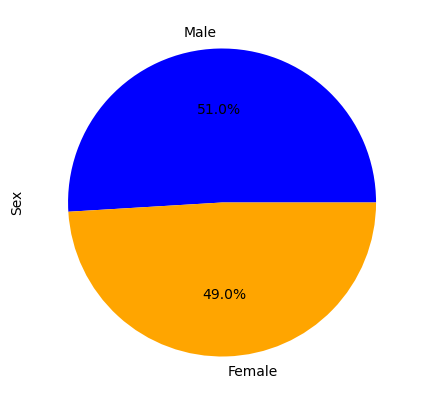

In [10]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex_counts = clean_df['Sex'].value_counts()
pie_chart = sex_counts.plot(kind='pie', autopct='%1.1f%%', colors=['blue', 'orange'], startangle=0, figsize=(5, 5))
pie_chart.set_ylabel('Sex')
plt.show()

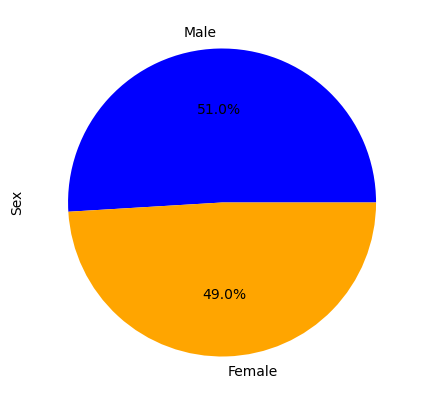

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.figure(figsize=(5, 5))
plt.pie(sex_counts, labels=sex_counts.index, autopct='%1.1f%%', colors=['blue', 'orange'], startangle=0)
plt.ylabel('Sex')
plt.show()

## Quartiles, Outliers and Boxplots

In [12]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse

last_timepoints = clean_df.groupby('Mouse ID')['Timepoint'].max()
merged_df = pd.merge(last_timepoints, clean_df, on=['Mouse ID', 'Timepoint'])


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
desired_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
final_tumor_volumes = merged_df[merged_df['Drug Regimen'].isin(desired_regimens)]
final_tumor_volumes

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
3,a275,45,62.999356,3,Ceftamin,Female,20,28
6,a411,45,38.407618,1,Ramicane,Male,3,22
7,a444,45,43.047543,0,Ramicane,Female,10,25
...,...,...,...,...,...,...,...,...
238,y769,45,68.594745,4,Ceftamin,Female,6,27
239,y793,45,31.896238,2,Capomulin,Male,17,17
240,y865,45,64.729837,3,Ceftamin,Male,23,26
244,z578,45,30.638696,0,Ramicane,Male,11,16


In [13]:
# Put treatments into a list for for loop (and later for plot labels)

desired_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    # Locate the rows which contain mice on each drug and get the tumor volumes
for treatment in desired_regimens:
    
    tumor_volumes = final_tumor_volumes[final_tumor_volumes['Drug Regimen'] == treatment]['Tumor Volume (mm3)']
    
    # add subset 
    tumor_vol_data.append(tumor_volumes)
    
  
    quartiles = tumor_volumes.quantile([0.25, 0.75])
    lower_quartile = quartiles[0.25]
    upper_quartile = quartiles[0.75]
    iqr = upper_quartile - lower_quartile
    
     # Determine outliers using upper and lower bounds
    lower_bound = lower_quartile - (1.5 * iqr)
    upper_bound = upper_quartile + (1.5 * iqr)
    
    outliers = tumor_volumes[(tumor_volumes < lower_bound) | (tumor_volumes > upper_bound)]  

    if len(outliers) > 0:
        print(f"{treatment}'s potential outliers: {outliers}")
    else:
        print(f"{treatment}'s potential outliers: {outliers}")

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


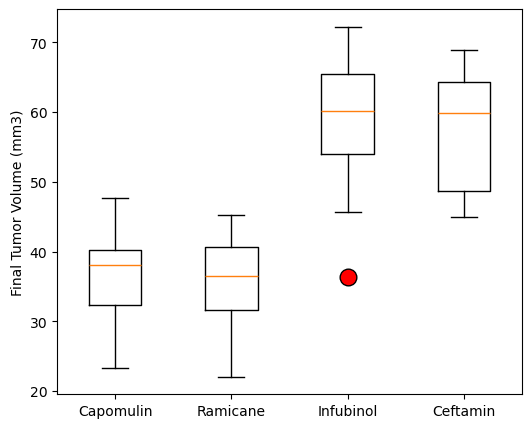

In [14]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.figure(figsize=(6, 5)) 
outlier_marker = dict(markerfacecolor='r', marker='o', markersize=12)
plt.boxplot(tumor_vol_data, labels=desired_regimens, flierprops=outlier_marker)  
plt.ylabel('Final Tumor Volume (mm3)')   
plt.show()  

## Line and Scatter Plots

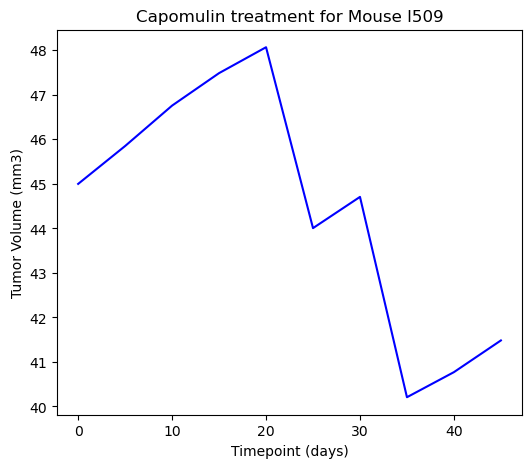

In [15]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin_data = clean_df[clean_df['Drug Regimen'] == 'Capomulin']
single_mouse_data = capomulin_data[capomulin_data['Mouse ID'] == 'l509']
plt.figure(figsize=(6, 5))
plt.plot(single_mouse_data['Timepoint'], single_mouse_data['Tumor Volume (mm3)'], color='blue')
plt.title('Capomulin treatment for Mouse l509')
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

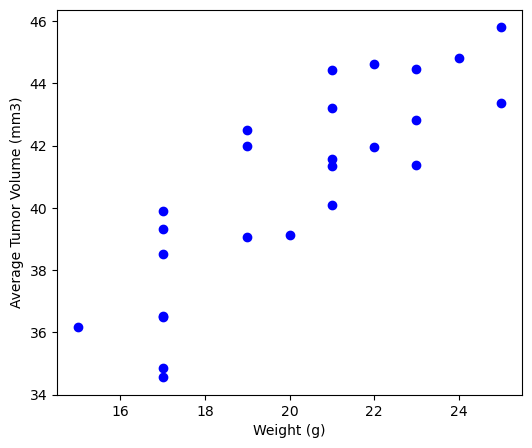

In [16]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
average_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()
merged_data = pd.merge(average_tumor_volume, clean_df[['Mouse ID', 'Weight (g)']], on='Mouse ID', how='left').drop_duplicates()
plt.figure(figsize=(6, 5))
plt.scatter(merged_data['Weight (g)'], merged_data['Tumor Volume (mm3)'], color='blue')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


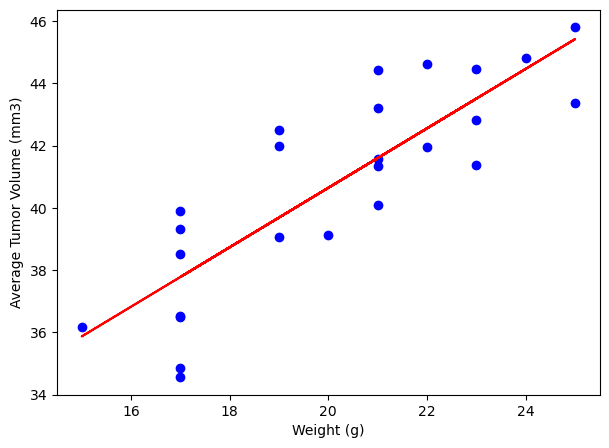

In [17]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
correlation_coefficient = merged_data['Weight (g)'].corr(merged_data['Tumor Volume (mm3)'])
slope, intercept, r_value, p_value, std_err = linregress(merged_data['Weight (g)'], merged_data['Tumor Volume (mm3)'])


print("The correlation between mouse weight and the average tumor volume is", "{:.2f}".format(correlation_coefficient))

plt.figure(figsize=(7, 5))
plt.scatter(merged_data['Weight (g)'], merged_data['Tumor Volume (mm3)'], color='blue', label='Data')
plt.plot(merged_data['Weight (g)'], slope * merged_data['Weight (g)'] + intercept, color='red', label='Regression Line')

plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()